# Vertical Motion of a Rocket With Gravity, Drag, and Thrust

## Objective
This notebook models the vertical motion of a rocket under gravity, aerodynamic drag, and constant thrust. The motion is simulated numerically using a fixed time step.

## Physical Assumptions
- Motion is one dimensional and vertical
- Earth is spherical and gravity decreases with altitude
- Air density decreases exponentially with altitude
- Drag force depends on velocity squared
- Thrust is constant
- Rocket mass is constant

## Import Required Libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


## Initial Conditions and Constants


In [6]:
# Initial conditions
y = 0            # m
v = 10           # m/s

# Time parameters
maxTime = 20     # s
dt = 0.1         # s

# Physical constants
g = 9.8          # m/s^2
Re = 6.7e6       # m

# Rocket and environment parameters
c = 0.5          # drag coefficient
A = 12           # m^2
m = 32000        # kg

# Atmospheric parameters
p0 = 1.15        # kg/m^3
k = 1.38e-23     # J/K
T = 300          # K
mair = 28 * 1.66e-27  # kg

# Thrust parameters
vex = 1958       # m/s
m_flow_rate = 578  # kg/s


## Air Density Model
The air density varies with altitude according to an exponential atmosphere model.


In [5]:
def air_density(y):
    return p0 * math.exp(-(mair * g * y) / (k * T))


## Time Array and Storage Variables


In [7]:
timeArray = np.arange(0, maxTime, dt)

ys = []
vs = []
acs = []


## Numerical Integration Loop


In [8]:
for t in timeArray:
    rho = air_density(y)

    F_drag = -0.5 * c * rho * A * v**2
    F_thrust = vex * m_flow_rate

    g_eff = -g / (1 + y / Re)**2
    a = g_eff + (F_drag / m) + (F_thrust / m)

    y = y + v * dt + 0.5 * a * dt**2
    v = v + a * dt

    ys.append(y)
    vs.append(v)
    acs.append(a)


## Height vs Time


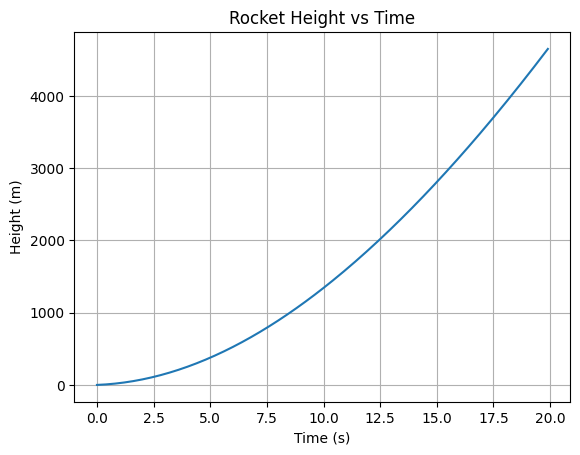

In [9]:
plt.figure()
plt.plot(timeArray, ys)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Rocket Height vs Time")
plt.grid()
plt.show()


## Velocity vs Time


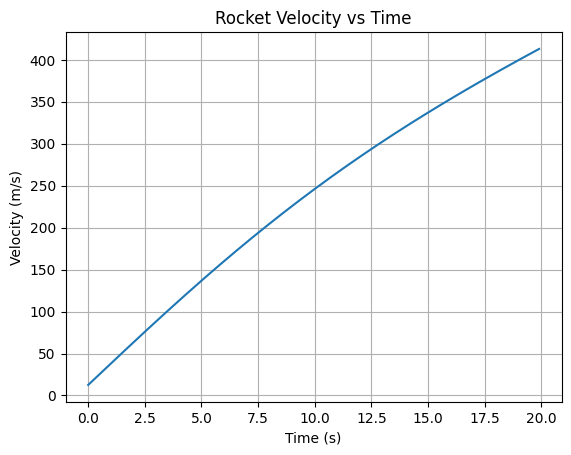

In [10]:
plt.figure()
plt.plot(timeArray, vs)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Rocket Velocity vs Time")
plt.grid()
plt.show()


## Acceleration vs Time


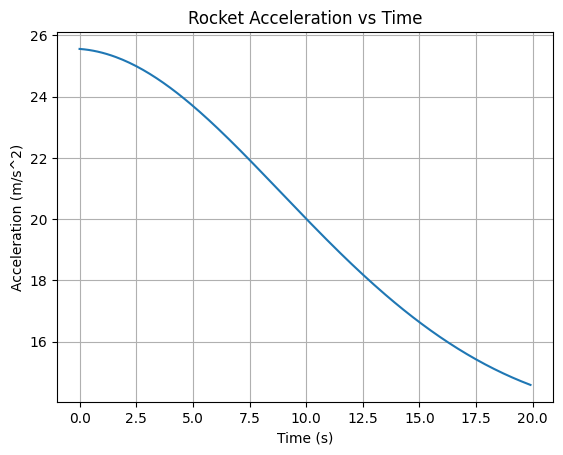

In [11]:
plt.figure()
plt.plot(timeArray, acs)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Rocket Acceleration vs Time")
plt.grid()
plt.show()


## Final Forces and Acceleration


In [12]:
print("Final Drag Force (N):", F_drag)
print("Thrust Force (N):", F_thrust)
print("Final Acceleration (m/s^2):", a)


Final Drag Force (N): -351840.68260386656
Thrust Force (N): 1131724
Final Acceleration (m/s^2): 14.584825040414927
